***Part 1: Dataset Preparation***

In [ ]:
#Load Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/New jersey listings.csv")

In [ ]:
# Display the first few rows
print(df.head())

       id                          listing_url       scrape_id last_scraped  \
0   40669   https://www.airbnb.com/rooms/40669  20241223022659   2024-12-23   
1  215768  https://www.airbnb.com/rooms/215768  20241223022659   2024-12-24   
2  254245  https://www.airbnb.com/rooms/254245  20241223022659   2024-12-24   
3  269266  https://www.airbnb.com/rooms/269266  20241223022659   2024-12-24   
4  270245  https://www.airbnb.com/rooms/270245  20241223022659   2024-12-24   

        source                                          name  \
0  city scrape                   Skyy’s Lounge / Cozyaezz so   
1  city scrape           Minutes to Manhattan & Jersey Shore   
2  city scrape             Minutes to Manhattan and NJ Shore   
3  city scrape  Modern private 2 bedrooms apt minutes to NYC   
4  city scrape   Private room with own bathroom close to NYC   

                                         description  \
0                                                NaN   
1  Walking to distance to St

In [ ]:
# Check DataFrame shape before operation
print("Initial shape:", df.shape)

Initial shape: (1897, 75)


In [ ]:
# Drop columns with too many missing values
df.drop(['host_name', 'last_review'], axis=1, inplace=True)

In [ ]:
# Fill missing numerical values with median
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [ ]:
#Handle outliers or inconsistencies
#Handle outliers or inconsistencies
for col in ['price', 'minimum_nights', 'maximum_nights']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower=lower, upper=upper)
print("After outlier capping:", df[['price','minimum_nights','maximum_nights']].describe(), "\n")


After outlier capping:        price  minimum_nights  maximum_nights
count    0.0     1897.000000     1897.000000
mean     NaN       14.347391      424.012778
std      NaN       23.932175      374.377318
min      NaN        1.000000        8.960000
25%      NaN        2.000000       90.000000
50%      NaN        3.000000      365.000000
75%      NaN       28.000000      365.000000
max      NaN      180.000000     1125.000000 



In [ ]:
# Check missing values again
print("Missing values per column:")
print(df.isnull().sum(), "\n")

Missing values per column:
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 73, dtype: int64 



In [ ]:
# Drop irrelevant columns
df.drop(['id', 'name', 'host_id'], axis=1, inplace=True)
print("Shape after dropping id, name, host_id:", df.shape, "\n")


Shape after dropping id, name, host_id: (1897, 70) 



In [ ]:
# Check DataFrame shape after dropping columns
print("Shape after dropping columns:", df.shape)

Shape after dropping columns: (1897, 70)


In [ ]:
# Understand the Distribution of Numeric & Categorical Variables
print("room_type distribution:")
print(df['room_type'].value_counts(), "\n")
print("neighbourhood_cleansed distribution:")
print(df['neighbourhood_cleansed'].value_counts(), "\n")

room_type distribution:
room_type
Entire home/apt    1223
Private room        662
Hotel room           10
Shared room           2
Name: count, dtype: int64 

neighbourhood_cleansed distribution:
neighbourhood_cleansed
Ward E (councilmember James Solomon)           415
Ward F (councilmember Jermaine D. Robinson)    386
Ward C (councilmember Richard Boggiano)        385
Ward D (councilmember Michael Yun)             328
Ward B (councilmember Mira Prinz-Arey)         211
Ward A (councilmember Denise Ridley)           172
Name: count, dtype: int64 



In [ ]:
df_encoded = pd.get_dummies(df, columns=['room_type', 'neighbourhood_cleansed'], drop_first=True)

print(df_encoded.shape)
print(df_encoded.head())
print(df_encoded.columns)


(1897, 76)
                           listing_url       scrape_id last_scraped  \
0   https://www.airbnb.com/rooms/40669  20241223022659   2024-12-23   
1  https://www.airbnb.com/rooms/215768  20241223022659   2024-12-24   
2  https://www.airbnb.com/rooms/254245  20241223022659   2024-12-24   
3  https://www.airbnb.com/rooms/269266  20241223022659   2024-12-24   
4  https://www.airbnb.com/rooms/270245  20241223022659   2024-12-24   

        source                                        description  \
0  city scrape                                                NaN   
1  city scrape  Walking to distance to Statue of Liberty and E...   
2  city scrape  Walking distance to Statue of Liberty and Elli...   
3  city scrape  Enjoy that private luxury two bedrooms apartme...   
4  city scrape  Just for you small bedroom with private bathro...   

                               neighborhood_overview  \
0  The neighborhood is very diverse & friendly sh...   
1  Such close proximity to NYC, 7 m

In [ ]:
print(df_encoded.columns)

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'a

In [ ]:
# Sum of dummy columns (True=1, False=0)
print(df_encoded[['room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']].sum())

print(df_encoded[['neighbourhood_cleansed_Ward B (councilmember Mira Prinz-Arey)',
                  'neighbourhood_cleansed_Ward C (councilmember Richard Boggiano)',
                  'neighbourhood_cleansed_Ward D (councilmember Michael Yun)',
                  'neighbourhood_cleansed_Ward E (councilmember James Solomon)',
                  'neighbourhood_cleansed_Ward F (councilmember Jermaine D. Robinson)']].sum())


room_type_Hotel room       10
room_type_Private room    662
room_type_Shared room       2
dtype: int64
neighbourhood_cleansed_Ward B (councilmember Mira Prinz-Arey)         211
neighbourhood_cleansed_Ward C (councilmember Richard Boggiano)        385
neighbourhood_cleansed_Ward D (councilmember Michael Yun)             328
neighbourhood_cleansed_Ward E (councilmember James Solomon)           415
neighbourhood_cleansed_Ward F (councilmember Jermaine D. Robinson)    386
dtype: int64


In [ ]:
# Identify dummy columns
dummy_cols = [col for col in df_encoded.columns if col.startswith('room_type_') or col.startswith('neighbourhood_cleansed_')]

# Convert only those to int
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

**PART 2: Exploratory Data Analysis (EDA)**

In [ ]:
#Check Dataset Shape and Info
# Number of rows and columns
print("Dataset Shape:", df.shape)

# Data type info and non-null counts
df.info()

Dataset Shape: (1897, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   1897 non-null   object 
 1   scrape_id                                     1897 non-null   int64  
 2   last_scraped                                  1897 non-null   object 
 3   source                                        1897 non-null   object 
 4   description                                   1876 non-null   object 
 5   neighborhood_overview                         891 non-null    object 
 6   picture_url                                   1897 non-null   object 
 7   host_url                                      1897 non-null   object 
 8   host_since                                    1897 non-null   object 
 9   host_location                        

In [ ]:
 #Basic Statistical Summary
 # For numeric columns.
 df.describe()

,scrape_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.897000e+03,1897.000000,1897.000000,0.0,1897.000000,1897.000000,1897.000000,1778.000000,1860.000000,1777.000000,...,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000
mean,2.024122e+13,117.843964,245.348972,NaN,40.725121,-74.061572,3.969425,1.348425,1.600000,2.119865,...,4.691410,4.839308,4.827451,4.579528,4.629150,10.649974,5.369004,5.207696,0.001581,1.737770
std,5.157610e-01,562.152151,775.591664,NaN,0.015399,0.016963,2.722990,0.638698,1.025338,1.536616,...,0.460909,0.347333,0.371198,0.451736,0.466031,13.729176,10.121928,11.097529,0.039746,1.427629
min,2.024122e+13,1.000000,1.000000,NaN,40.685650,-74.107528,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.024122e+13,2.000000,2.000000,NaN,40.715410,-74.074210,2.000000,1.000000,1.000000,1.000000,...,4.610000,4.820000,4.800000,4.430000,4.530000,1.000000,1.000000,0.000000,0.000000,0.550000
50%,2.024122e+13,5.000000,7.000000,NaN,40.724200,-74.059620,3.000000,1.000000,1.000000,2.000000,...,4.810000,4.930000,4.930000,4.670000,4.740000,4.000000,2.000000,0.000000,0.000000,1.430000
75%,2.024122e+13,24.000000,38.000000,NaN,40.734608,-74.047180,5.000000,2.000000,2.000000,3.000000,...,4.960000,5.000000,5.000000,4.880000,4.880000,15.000000,4.000000,4.000000,0.000000,2.560000
max,2.024122e+13,4660.000000,4957.000000,NaN,40.760090,-74.029400,16.000000,6.000000,10.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,52.000000,44.000000,52.000000,1.000000,8.820000


In [ ]:
#Check for Missing Values
df.isnull().sum().sort_values(ascending=False)

,0
neighbourhood_group_cleansed,1897
price,1897
calendar_updated,1897
license,1501
neighborhood_overview,1006
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [ ]:
#Unique Values in Categorical Columns
print(df['room_type'].value_counts())
print(df['neighbourhood_cleansed'].value_counts())

room_type
Entire home/apt    1223
Private room        662
Hotel room           10
Shared room           2
Name: count, dtype: int64
neighbourhood_cleansed
Ward E (councilmember James Solomon)           415
Ward F (councilmember Jermaine D. Robinson)    386
Ward C (councilmember Richard Boggiano)        385
Ward D (councilmember Michael Yun)             328
Ward B (councilmember Mira Prinz-Arey)         211
Ward A (councilmember Denise Ridley)           172
Name: count, dtype: int64


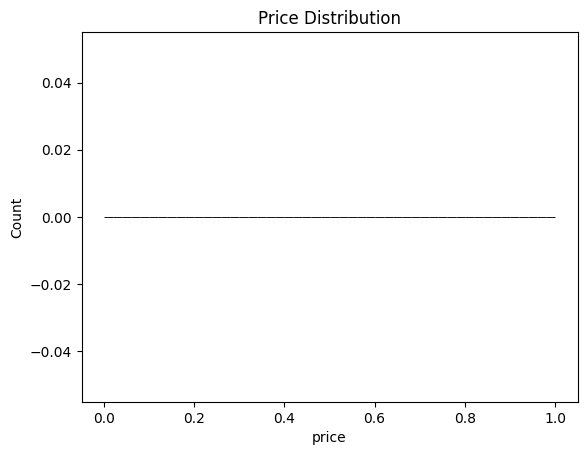

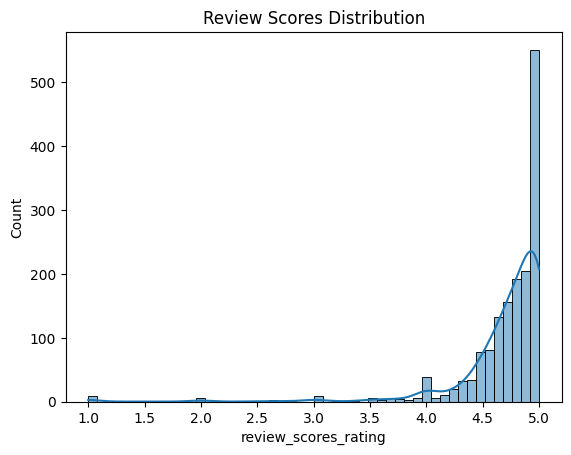

In [ ]:
#Distribution Plots
#Understand spread and outliers.
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

# Review scores distribution
sns.histplot(df['review_scores_rating'], bins=50, kde=True)
plt.title('Review Scores Distribution')
plt.show()


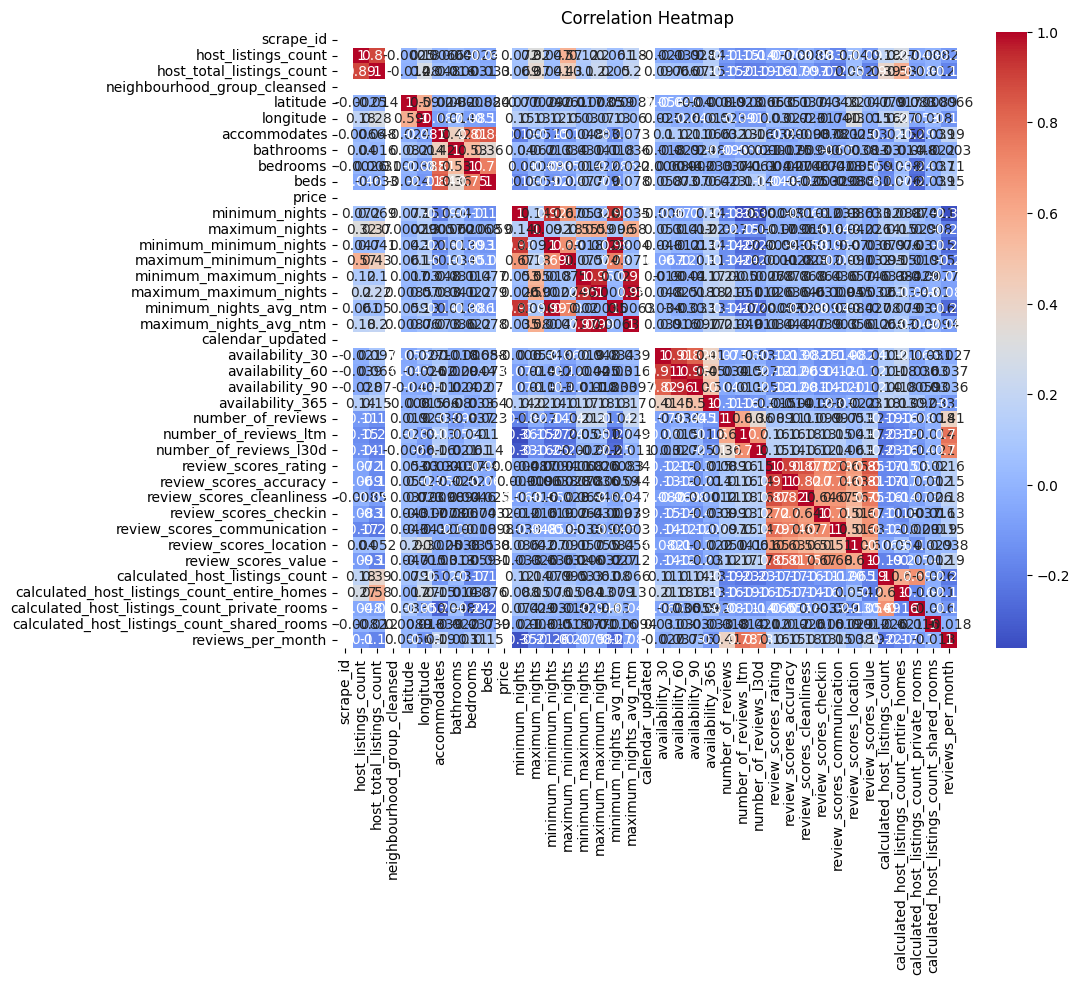

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Boxplots to Spot Outliers
df_original = pd.read_csv('/content/New jersey listings.csv')
print(df_original[['price']].head(10))


     price
0  $150.00
1  $194.00
2  $194.00
3  $130.00
4   $62.00
5   $82.00
6  $120.00
7  $100.00
8  $120.00
9  $103.00


In [ ]:
df_original['price'] = df_original['price'].replace('[\$,]', '', regex=True)
df_original['price'] = pd.to_numeric(df_original['price'], errors='coerce')


In [ ]:
print(df_original['price'].describe())


count    1774.000000
mean      204.567644
std       215.966641
min        19.000000
25%        85.000000
50%       164.000000
75%       255.000000
max      4095.000000
Name: price, dtype: float64


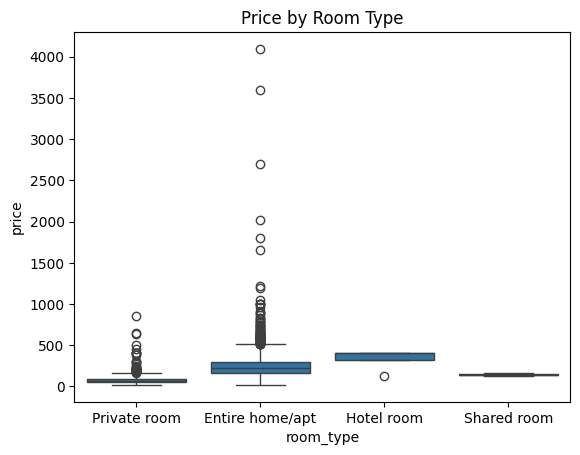

In [ ]:
sns.boxplot(x='room_type', y='price', data=df_original)
plt.title('Price by Room Type')
plt.show()


<Axes: xlabel='number_of_reviews', ylabel='price'>

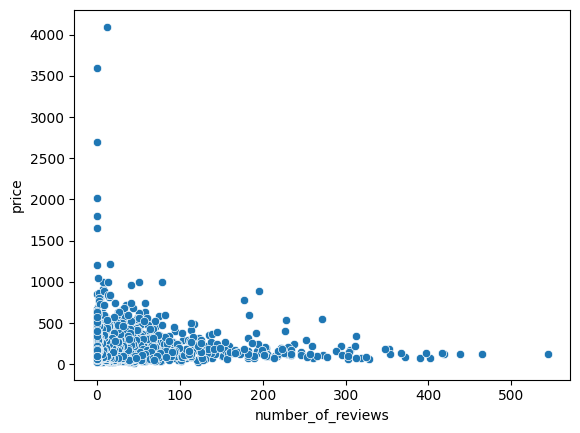

In [ ]:
#Scatterplot of price vs. number_of_reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df_original)

<Axes: xlabel='room_type', ylabel='count'>

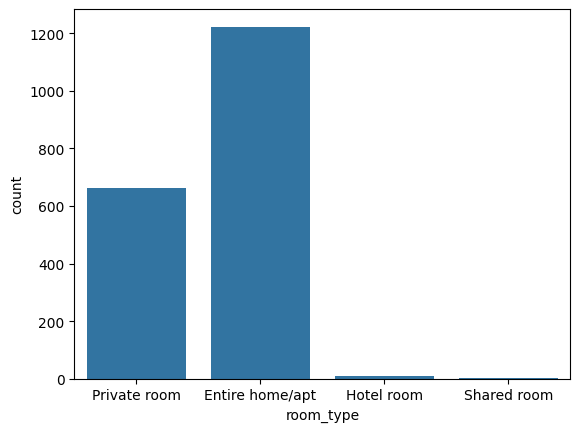

In [ ]:
#Count plot for room_type or neighbourhood_group
sns.countplot(x='room_type', data=df_original)


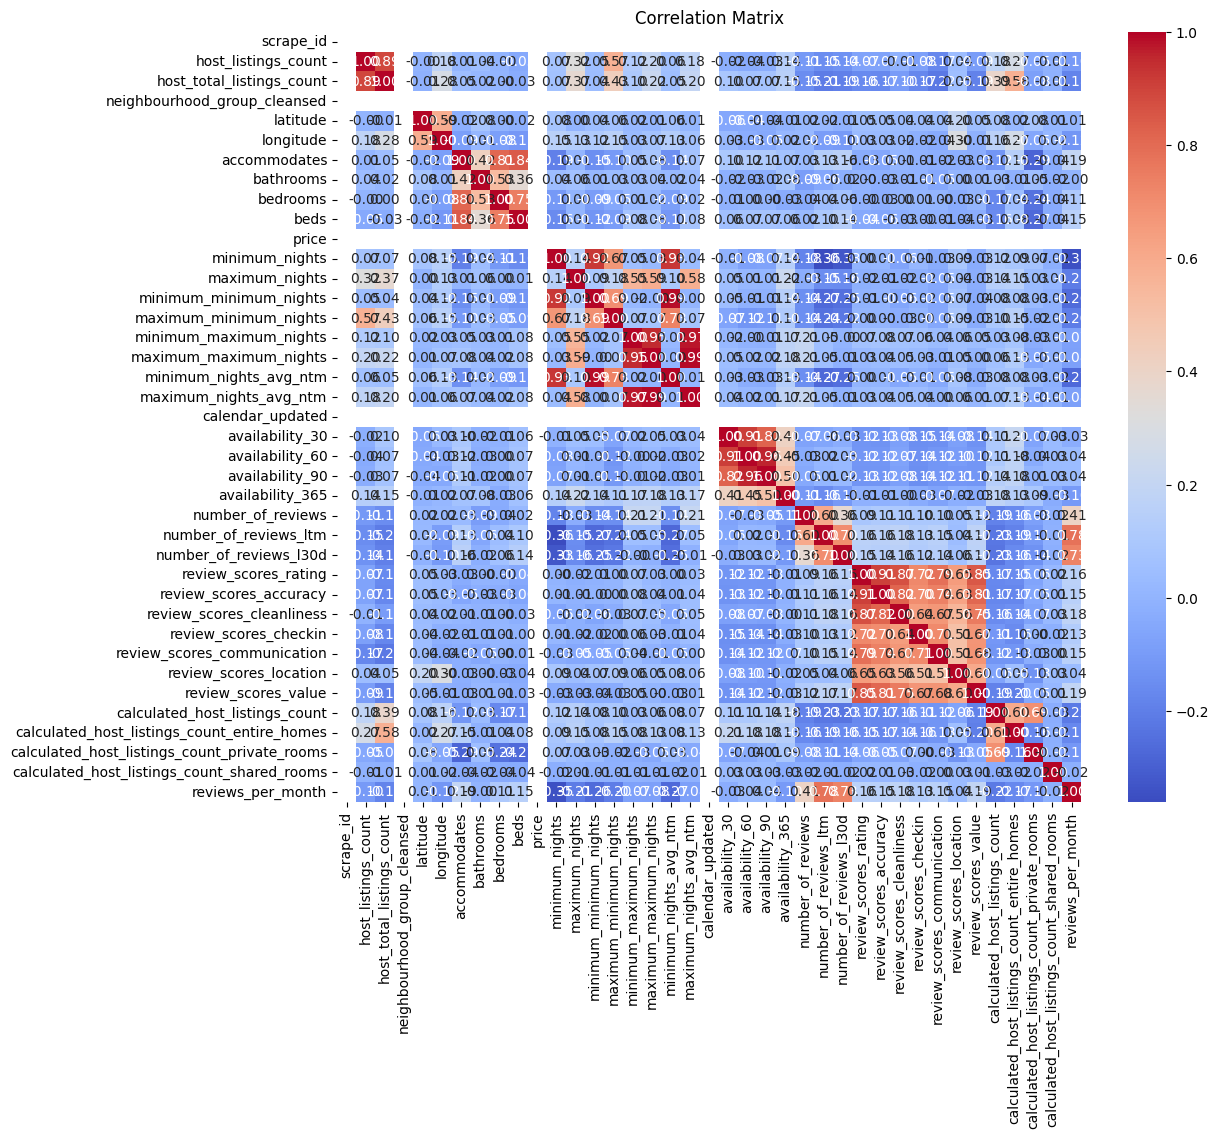

In [ ]:
#Feature Selection
#Correlation Checks
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop irrelevant columns
df_filtered = df.drop(columns=['id', 'name', 'host_name', 'last_review', 'license'], errors='ignore')


**PART :3 Statistical Testing**

In [ ]:
#Two-sample Independent t-test
from scipy.stats import ttest_ind

def run_independent_ttest(df, group_column, target_column, group1, group2, equal_var=True):
    """
    Performs an independent two-sample t-test comparing the target_column
    between two specified groups in group_column.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame.
    group_column : str
        Name of the categorical column to split on.
    target_column : str
        Name of the numeric column to test.
    group1 : str
        Value in group_column for sample 1.
    group2 : str
        Value in group_column for sample 2.
    equal_var : bool, optional (default=True)
        If True, perform Student’s t-test (assumes equal variances).
        If False, perform Welch’s t-test (does not assume equal variances).

    Returns
    -------
    t_stat : float
        The computed t-statistic.
    p_val : float
        The associated two-tailed p-value.
    """
    # Extract and clean the two samples
    sample1 = df.loc[df[group_column] == group1, target_column].dropna()
    sample2 = df.loc[df[group_column] == group2, target_column].dropna()

    print(f"Sample sizes → '{group1}': {len(sample1)}, '{group2}': {len(sample2)}")

    # Run the t-test
    t_stat, p_val = ttest_ind(sample1, sample2, equal_var=equal_var)
    print(f"\nt-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    return t_stat, p_val

# T-test example: comparing review scores between entire home vs private room
ttest_ind(df[df['room_type'] == 'Entire home/apt']['review_scores_rating'].dropna(),
          df[df['room_type'] == 'Private room']['review_scores_rating'].dropna())

TtestResult(statistic=np.float64(2.365584630279861), pvalue=np.float64(0.0181220186746439), df=np.float64(1577.0))

In [ ]:
print(df.columns)


Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
 

In [ ]:
#One-Way ANOVA on Room Type vs Review Scores
from scipy.stats import f_oneway

def run_oneway_anova(df, grouping_column, target_column):
    """
    Performs one-way ANOVA on target_column across the levels of grouping_column.

    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame.
    grouping_column : str
        Name of the categorical column to group by.
    target_column : str
        Name of the numeric column to test.

    Returns
    -------
    f_stat : float
        The computed F-statistic.
    p_val : float
        The associated p-value.
    """
    # Identify the unique groups
    groups = df[grouping_column].dropna().unique()

    # Collect the target values for each group, dropping NaNs
    anova_data = []
    for grp in groups:
        vals = df.loc[df[grouping_column] == grp, target_column].dropna()
        print(f"Group '{grp}': n = {len(vals)}")  # debug/group sizes
        anova_data.append(vals)

    # Run ANOVA
    f_stat, p_val = f_oneway(*anova_data)
    print(f"\nANOVA F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    return f_stat, p_val

#Assuming df is DataFrame
f_stat, p_val = run_oneway_anova(df, 'room_type', 'review_scores_rating')

Group 'Private room': n = 552
Group 'Entire home/apt': n = 1027
Group 'Hotel room': n = 8
Group 'Shared room': n = 2

ANOVA F-statistic: 8.5843
p-value: 0.0000


In [ ]:
#Two-way ANOVA
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

def perform_two_way_anova(df, dependent_var, factor1, factor2):
    """
    Perform Two-Way ANOVA with interaction on a given dataset.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - dependent_var (str): The name of the dependent variable (e.g., 'review_scores_rating').
    - factor1 (str): The first categorical independent variable (e.g., 'room_type').
    - factor2 (str): The second categorical independent variable (e.g., 'host_is_superhost').

    Returns:
    - anova_table (pd.DataFrame): The ANOVA results.
    - model (statsmodels RegressionResults): The fitted OLS model.
    """
    # Drop missing values for relevant columns
    anova_df = df[[dependent_var, factor1, factor2]].dropna().copy()

    # Convert factors to categorical if they aren't already
    anova_df[factor1] = anova_df[factor1].astype('category')
    anova_df[factor2] = anova_df[factor2].astype('category')

    # Define and fit the model with interaction
    formula = f'{dependent_var} ~ C({factor1}) * C({factor2})'
    model = ols(formula, data=anova_df).fit()

    # Generate ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)

    return anova_table, model

# Example usage:
anova_results, fitted_model = perform_two_way_anova(df, 'review_scores_rating', 'room_type', 'host_is_superhost')
print(anova_results)

                                       sum_sq      df           F  \
C(room_type)                         4.159314     3.0    7.613457   
C(host_is_superhost)                24.607190     1.0  135.127424   
C(room_type):C(host_is_superhost)    0.065046     3.0    0.119065   
Residual                           276.797463  1520.0         NaN   

                                         PR(>F)  
C(room_type)                       5.128252e-04  
C(host_is_superhost)               5.509025e-30  
C(room_type):C(host_is_superhost)  8.877585e-01  
Residual                                    NaN  


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [ ]:
#Chi-Square Test Between Room Type and Instant Bookable
from scipy.stats import chi2_contingency
import pandas as pd

def run_chi_square_test(df, col1, col2):
    """
    Performs a Chi-Square test of independence between two categorical variables.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    col1 : str
        Name of the first categorical column.
    col2 : str
        Name of the second categorical column.

    Returns
    -------
    chi2_stat : float
        The Chi-Square statistic.
    p_val : float
        The p-value of the test.
    dof : int
        Degrees of freedom.
    expected : ndarray
        The expected frequencies table.
    """
    #  Build the contingency table
    contingency = pd.crosstab(df[col1], df[col2])
    print("Contingency Table:")
    print(contingency)

    # Run Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

    # Print results
    print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
    print(f"p-value:             {p_val:.4f}")
    print(f"Degrees of Freedom:  {dof}")

    # Show expected frequencies as DataFrame
    expected_df = pd.DataFrame(
        expected,
        index=contingency.index,
        columns=contingency.columns
    )
    print("\nExpected Frequencies:")
    print(expected_df)

    return chi2_stat, p_val, dof, expected

# Usage example:
chi2_stat, p_val, dof, expected = run_chi_square_test(
    df,
    col1='room_type',
    col2='instant_bookable'
)

Contingency Table:
instant_bookable    f    t
room_type                 
Entire home/apt   760  463
Hotel room          1    9
Private room      510  152
Shared room         2    0

Chi-Square Statistic: 58.9962
p-value:             0.0000
Degrees of Freedom:  3

Expected Frequencies:
instant_bookable           f           t
room_type                               
Entire home/apt   820.705851  402.294149
Hotel room          6.710596    3.289404
Private room      444.241434  217.758566
Shared room         1.342119    0.657881


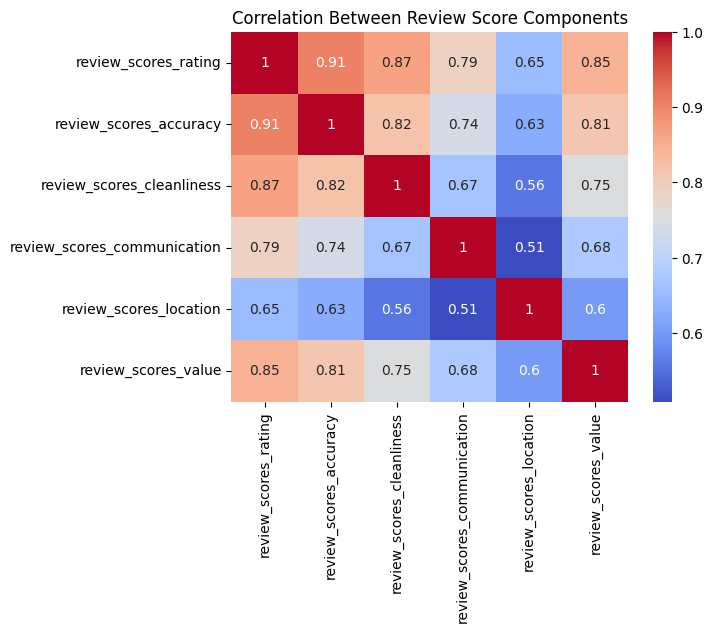

In [ ]:
#Correlation Analysis (Review Scores vs Other Scores)
correlation_matrix = df[['review_scores_rating',
                         'review_scores_accuracy',
                         'review_scores_cleanliness',
                         'review_scores_communication',
                         'review_scores_location',
                         'review_scores_value']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Review Score Components")
plt.show()


**Part 4: Predictive Model Building**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def run_linear_regression(df, target_column, feature_columns, categorical_columns=[]):
    # Clean target column
    df[target_column] = df[target_column].replace('[\$,]', '', regex=True).astype(float)

    # Drop rows where target is missing
    df = df.dropna(subset=[target_column])

    # Create dummy variables for categorical features (avoiding dummy variable trap)
    if categorical_columns:
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    # Update feature list after encoding
    # Ensure only existing columns are selected after encoding
    feature_columns = [col for col in feature_columns if col in df.columns and col != target_column]

    # Handle missing values for numerical features
    data = df[feature_columns + [target_column]].copy()

    # Select only numeric features for imputation
    numeric_features = data[feature_columns].select_dtypes(include=np.number).columns.tolist()

    # Apply imputation to numeric features only
    if numeric_features:  # Check if there are any numeric features
        imputer = SimpleImputer(strategy='mean')
        data[numeric_features] = imputer.fit_transform(data[numeric_features])

    X = data[feature_columns]  # Use the updated data with imputed values
    y = data[target_column]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model trained with RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("Coefficients:")
    for feat, coef in zip(X.columns, model.coef_):
        print(f"{feat}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.2f}")

    return model, X_test, y_test, y_pred

if __name__ == "__main__":
    # Load your data
    df = pd.read_csv('/content/New jersey listings.csv')

    # Define features
    numeric_features = [
        'accommodates',
        'bedrooms',
        'number_of_reviews',
        'review_scores_rating'
    ]
    categorical_features = ['room_type', 'host_is_superhost']
    target = 'price'

    all_features = numeric_features + categorical_features

    # Run regression
    model, X_test, y_test, y_pred = run_linear_regression(df, target, all_features, categorical_columns=categorical_features)

Model trained with RMSE: 100.38
R² Score: 0.64
Coefficients:
accommodates: 28.4067
bedrooms: 48.8630
number_of_reviews: -0.1485
review_scores_rating: 15.8136
Intercept: -55.11
